<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 7
<br>Group member1: Joseph Tharayil
<br>Group member2: Kiyarash Farivar
<br>Group member3: Diogo Ramalho

In [26]:
%matplotlib inline

# Ex1: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a curret clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitud 1 pA and duration 10 ms. Then do the following:
    
<font size="3">- increase and decrease the number of segments per section.
    
<font size="3">- plot the voltage distribution at t = 2.975 ms (remember that we record the time every 0.025 ms)
    
<font size="3">- change the stimulation point to the begining and to the end of the soma section.
     

<font size="3">Plot the result for each of the previous points and explain what is happening in each situation. In this exercise is important to keep the previous values each time you change some parameter.
If not, you won’t be able to compare them. [0.75 pts]

# Ex 2. Action Potential Back Propagation. 

<font size='3'>Create a neuron with a soma and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma and to the dendrite, but not to the branches. You can use the parameters from tutorial 03. Perform a current clamp experiment in which the soma is stimulated at the center and the branches are recorded at the end. Choose the best stimulation parameters to see the signal attenuation in the branches.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the voltage signal propagation from the soma to each of the branches? 
    
<font size='3'>- What happens if the active properties of the dendrite are removed? [1.25 pts]

In [ ]:
from neuron import h

In [86]:
soma = h.Section()
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

soma.L = 10
soma.diam = 10
soma.cm = 1

dend = h.Section(name='dend')
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

dend.L = 200       # length (µm)
dend.diam = 10     # diameter (µm)

dend.connect(soma(0))

branch_0 = h.Section(name='branch_0')
branch_0.Ra = 123.0   # axial resistivity (Ω*cm)
branch_0.cm = 1       # capacitance (µF/cm^2) 

branch_1 = h.Section(name='branch_1')
branch_1.Ra = 123.0   # axial resistivity (Ω*cm)
branch_1.cm = 1       # capacitance (µF/cm^2) 

branch_2 = h.Section(name='branch_2')
branch_2.Ra = 123.0   # axial resistivity (Ω*cm)
branch_2.cm = 1       # capacitance (µF/cm^2) 

branchlst = [branch_0,branch_1,branch_2]

# Branch geometry
branch_0.L = 300
branch_0.diam = 10

branch_1.L = 300
branch_1.diam = 8

branch_2.L = 300
branch_2.diam = 3


# Connect them
branch_0.connect(dend(1))
branch_1.connect(dend(1))
branch_2.connect(dend(1))

for sec in h.allsec():
    sec.insert('pas')
    sec.nseg = 1
    for seg in sec:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70
        
soma.insert('hh')
for seg in soma:
        seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
        seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
dend.insert('hh')
for seg in dend:
        seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
        seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [88]:
stim = h.IClamp(soma(0.5))
stim.delay = 10
stim.dur = 10
stim.amp = 1

In [91]:
v0 = h.Vector()
v0.record(branch_0(1)._ref_v)

v1 = h.Vector()
v1.record(branch_1(1)._ref_v)

v2 = h.Vector()
v2.record(branch_2(1)._ref_v)

rec_t = h.Vector()
rec_t.record(h._ref_t)

Vector[5876]

In [93]:
h.load_file('stdrun.hoc')
h.finitialize(-70) # initial voltage
h.continuerun(200) # final time

0.0

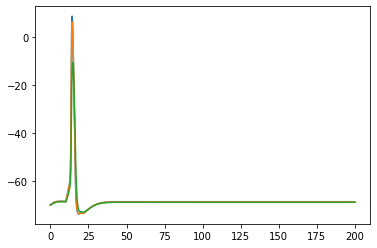

In [94]:
plt.figure()
plt.plot(rec_t,v0)
plt.plot(rec_t,v1)
plt.plot(rec_t,v2)
plt.show()

# Ex 3. Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) at their midpoints. Play around with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot some results that would help you explain: what is dendritic signal integration? And, in your opinion, what is the importance of this in biology? [2.5]

<font size="3"> __Hint:__ use the information on the articles that you can find in the home work folder in the moodle for this week 4.

In [3]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

In [4]:
!pwd

/home/my_notebooks/Week4


In [5]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('HomeWork/Group7_morphology.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.dendritic.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            if 'axon' in sec.name():
                self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """   
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert('pas')
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70
        
        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.dendritic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.apical:
            # insert hh
            sec.insert('hh')
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.axonal:
            # insert hh
            sec.insert('hh')
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [6]:
Cell = NEURON()


19847 lines read


In [16]:
# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

# Convenience functions for setting up stimulation, recording and simulation

def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay = 100, amplitude = 0.1, duration = 500):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst = [], idictlst = [], vmax = 40, imax = 0.5):
    plt.figure()
    plt.title('currents')
    #plt.ylim((-0.01,imax))
    plt.xlabel('t (ms)')
    plt.ylabel('I (pA)')
    for idict in idictlst:
        plt.plot(t,idict['vec'],label=idict['loc'])
    #plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
    #plt.ylim((-71,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    #plt.xlim(50, 150)
    for vdict in vdictlst:
        plt.plot(t,vdict['vec'],label=vdict['loc'])
    #plt.legend(loc=1)

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })
    
# Plot morphology
def plot_morpho(fname = 'cell_01'):
    fname = '{}.swc'.format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_neuron(fname)
    viewer.draw(neuron1)

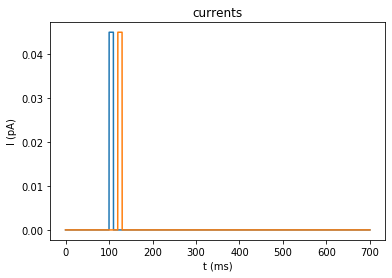

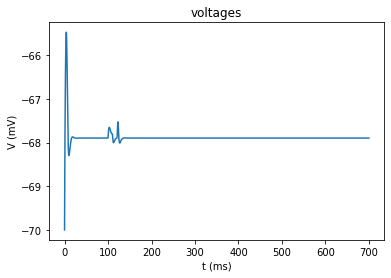

In [82]:
reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(Cell.dendritic[104:106]):
    iclamp(dendrites(0.5), amplitude = 0.01*4.5, delay = 100 + idx * 20, duration = 10)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

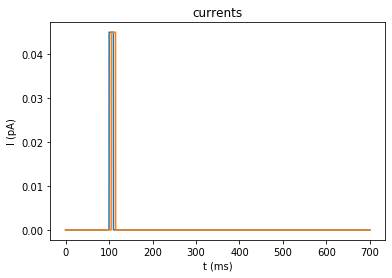

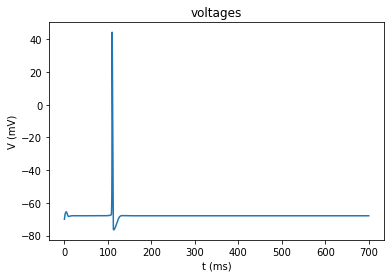

In [83]:
reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(Cell.dendritic[104:106]):
    iclamp(dendrites(0.5), amplitude = 0.01*4.5, delay = 100 + idx * 5, duration = 10)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

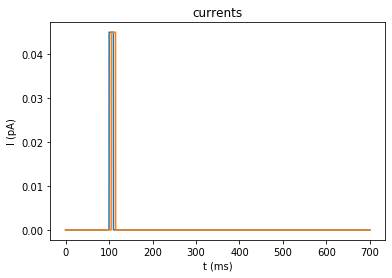

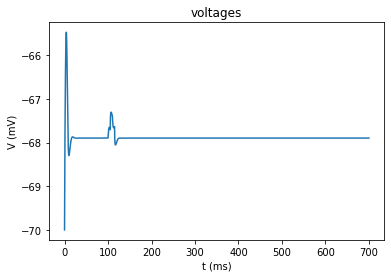

In [84]:
reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate([Cell.dendritic[104],Cell.apical[0]]):
    iclamp(dendrites(0.5), amplitude = 0.01*4.5, delay = 100 + idx * 5, duration = 10)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

Dendritic signal integration is the spatiotemporal combination of afferent signals on different dendrites, whcih influences neuronal behavior. 

Here we observe that for the two selected basal dendrites, non-overlapping signals will not produce an action potential, whereas overlapping signals will. This allows the neuron to be sensitive to temporal information encoded in delays between inputs from different sources.

Similarly, if we choose a different pair of neurites, an action potential will not be generated even with overlapping inputs. This indicates that the neuron is also sensitive to spatial information.

# Ex 4. Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<font size="3">What would you expect in terms of attenuation? Would you expect the signal to be more attenuated in the axon or in the dendrites? Why? [1.5 pts]